## Read CSV, check the distribution of the output

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0060,0.0105,0.0155,0.0229,0.0357,0.0427,0.0502,0.0477,0.0482,0.0496,...,0.0343,0.0299,0.0247,0.0199,0.0200,0.0229,0.0228,0.0217,0.0158,0.0169
1,0.0031,0.0071,0.0115,0.0199,0.0333,0.0513,0.0608,0.0551,0.0700,0.0576,...,0.0297,0.0223,0.0215,0.0152,0.0162,0.0172,0.0180,0.0172,0.0124,0.0133
2,0.0847,0.2171,0.1886,0.1264,0.1083,0.0678,0.0409,0.0272,0.0207,0.0159,...,0.0057,0.0027,0.0039,0.0008,0.0046,0.0014,0.0011,0.0070,0.0007,0.0016
3,0.0259,0.0480,0.0699,0.0683,0.0997,0.0965,0.0786,0.0606,0.0528,0.0481,...,0.0163,0.0114,0.0093,0.0061,0.0098,0.0065,0.0061,0.0097,0.0037,0.0053
4,0.0022,0.0039,0.0094,0.0142,0.0231,0.0294,0.0428,0.0360,0.0369,0.0395,...,0.0389,0.0404,0.0313,0.0265,0.0279,0.0355,0.0333,0.0319,0.0308,0.0251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551467,0.0012,0.0018,0.0037,0.0062,0.0098,0.0139,0.0191,0.0207,0.0174,0.0209,...,0.0763,0.0707,0.0467,0.0438,0.0410,0.0441,0.0510,0.0520,0.0631,0.0449
551468,0.0016,0.0021,0.0047,0.0089,0.0144,0.0183,0.0229,0.0238,0.0215,0.0274,...,0.0709,0.0644,0.0392,0.0426,0.0448,0.0389,0.0467,0.0469,0.0472,0.0386
551469,0.0022,0.0043,0.0065,0.0102,0.0170,0.0218,0.0288,0.0293,0.0264,0.0294,...,0.0718,0.0555,0.0412,0.0311,0.0360,0.0320,0.0356,0.0380,0.0313,0.0351
551470,0.0259,0.0362,0.0337,0.0507,0.0546,0.0578,0.0567,0.0479,0.0375,0.0388,...,0.0384,0.0284,0.0254,0.0204,0.0197,0.0151,0.0167,0.0189,0.0122,0.0124


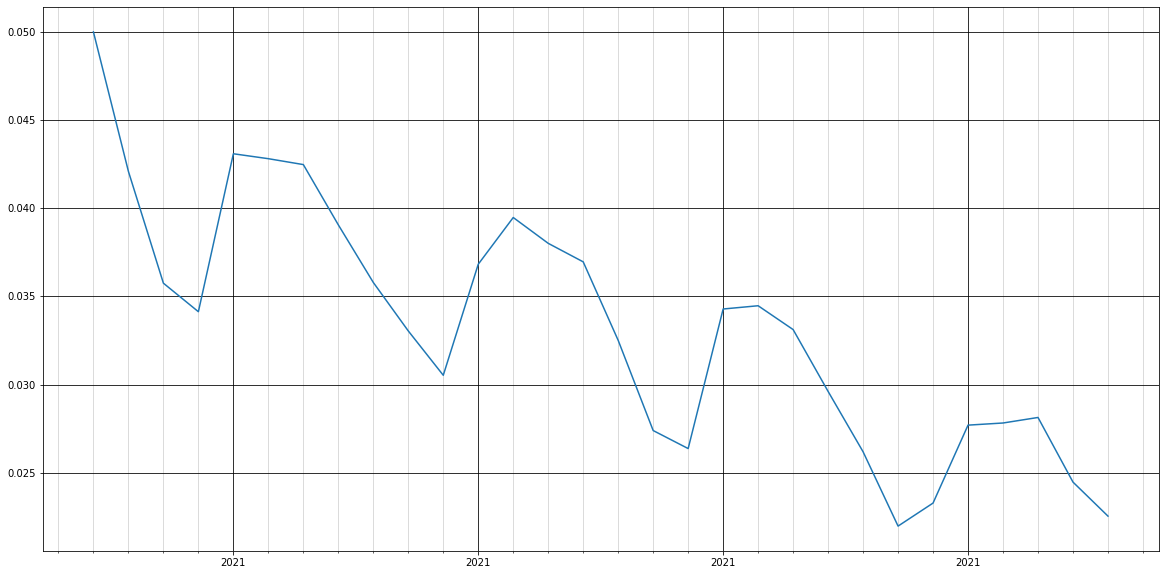

In [1]:
import pandas as pd

import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
df1 = pd.read_csv('./ensemble.csv.gz',compression='gzip',header=None,index_col=None)
import datetime
d0 = pd.to_datetime([datetime.datetime(year=2021, month=4, day=i+1) for i in range(30)])

display(df1)
fig, ax = plt.subplots(figsize=(20,10))

ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.WeekdayLocator(0))
ax.grid(which='minor',c='lightgray')
ax.grid(which='major',c='black')
ax.plot(d0,np.mean(df1.values,axis=0))


In [3]:
print(df1.values.max())

18.5871


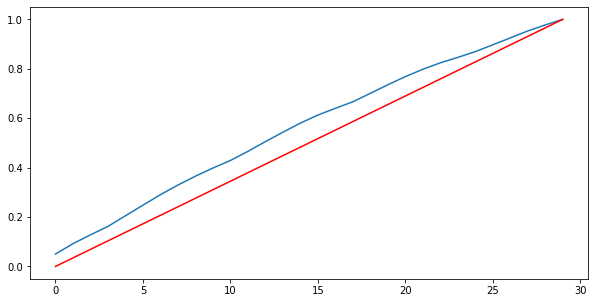

In [3]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.mean(df.values.cumsum(axis=1),axis=0))

ax.plot([0,29],[0,1.0],c='red')



In [ ]:
"""
    Let's bias this in some way, to fit it to the LB
"""
mults = [1.0,1.0,1.]
for i in range(30):
    df.iloc[i,:] = 

## Visualize histogram of validation labels

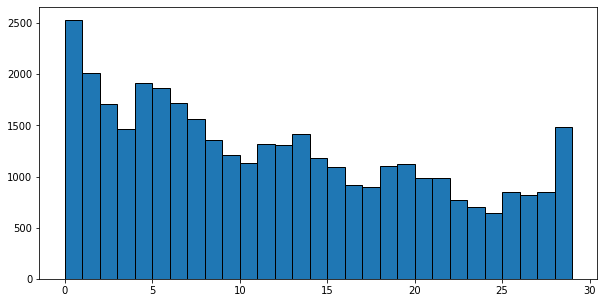

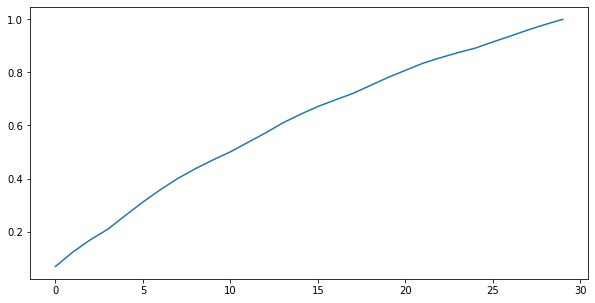

In [14]:
import torch
val_labels = torch.cat([el.target.view(-1,30) for el in torch.load('./dataset/converted/val.pt',map_location='cuda')],
                 axis=0).cpu().numpy()
val_labels_probs = np.argmax(val_labels,1)
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(val_labels_probs,bins=range(30),edgecolor='black')
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.mean(val_labels,axis=0))

## Post-Processing: It seems that the solution performs well on LB when we do one of the following:

### a)Multiply each of the days (0-30) by a multiplier, which is a linspace interpolated from 1.0 to some value (I think it was something like 2.0)

### b) Divide each column by its mean


[0.99656731 0.88054948 0.81741598 0.79082346 0.98151089 1.
 0.98039984 0.99656731 0.88054948 0.81741598 0.79082346 0.98151089
 1.         0.98039984 0.99656731 0.88054948 0.81741598 0.79082346
 0.98151089 1.         0.98039984 0.99656731 0.88054948 0.81741598
 0.79082346 0.98151089 1.         0.98039984 0.99656731 0.88054948]


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0060,0.0105,0.0155,0.0229,0.0357,0.0427,0.0502,0.0477,0.0482,0.0496,...,0.0343,0.0299,0.0247,0.0199,0.0200,0.0229,0.0228,0.0217,0.0158,0.0169
1,0.0031,0.0071,0.0115,0.0199,0.0333,0.0513,0.0608,0.0551,0.0700,0.0576,...,0.0297,0.0223,0.0215,0.0152,0.0162,0.0172,0.0180,0.0172,0.0124,0.0133
2,0.0847,0.2171,0.1886,0.1264,0.1083,0.0678,0.0409,0.0272,0.0207,0.0159,...,0.0057,0.0027,0.0039,0.0008,0.0046,0.0014,0.0011,0.0070,0.0007,0.0016
3,0.0259,0.0480,0.0699,0.0683,0.0997,0.0965,0.0786,0.0606,0.0528,0.0481,...,0.0163,0.0114,0.0093,0.0061,0.0098,0.0065,0.0061,0.0097,0.0037,0.0053
4,0.0022,0.0039,0.0094,0.0142,0.0231,0.0294,0.0428,0.0360,0.0369,0.0395,...,0.0389,0.0404,0.0313,0.0265,0.0279,0.0355,0.0333,0.0319,0.0308,0.0251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551467,0.0012,0.0018,0.0037,0.0062,0.0098,0.0139,0.0191,0.0207,0.0174,0.0209,...,0.0763,0.0707,0.0467,0.0438,0.0410,0.0441,0.0510,0.0520,0.0631,0.0449
551468,0.0016,0.0021,0.0047,0.0089,0.0144,0.0183,0.0229,0.0238,0.0215,0.0274,...,0.0709,0.0644,0.0392,0.0426,0.0448,0.0389,0.0467,0.0469,0.0472,0.0386
551469,0.0022,0.0043,0.0065,0.0102,0.0170,0.0218,0.0288,0.0293,0.0264,0.0294,...,0.0718,0.0555,0.0412,0.0311,0.0360,0.0320,0.0356,0.0380,0.0313,0.0351
551470,0.0259,0.0362,0.0337,0.0507,0.0546,0.0578,0.0567,0.0479,0.0375,0.0388,...,0.0384,0.0284,0.0254,0.0204,0.0197,0.0151,0.0167,0.0189,0.0122,0.0124


0.0
0.9294


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0060,0.0110,0.0177,0.0265,0.0407,0.0499,0.0579,0.0609,0.0593,0.0613,...,0.0508,0.0503,0.0415,0.0370,0.0340,0.0406,0.0410,0.0378,0.0322,0.0330
1,0.0031,0.0074,0.0131,0.0231,0.0379,0.0599,0.0702,0.0703,0.0861,0.0712,...,0.0440,0.0375,0.0361,0.0283,0.0275,0.0305,0.0323,0.0300,0.0252,0.0260
2,0.0844,0.2271,0.2156,0.1464,0.1234,0.0792,0.0472,0.0347,0.0255,0.0197,...,0.0084,0.0045,0.0066,0.0015,0.0078,0.0025,0.0020,0.0122,0.0014,0.0031
3,0.0258,0.0502,0.0799,0.0791,0.1136,0.1127,0.0907,0.0773,0.0649,0.0595,...,0.0241,0.0192,0.0156,0.0113,0.0166,0.0115,0.0110,0.0169,0.0075,0.0103
4,0.0022,0.0041,0.0107,0.0164,0.0263,0.0343,0.0494,0.0459,0.0454,0.0489,...,0.0576,0.0680,0.0526,0.0493,0.0474,0.0629,0.0598,0.0556,0.0627,0.0490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551467,0.0012,0.0019,0.0042,0.0072,0.0112,0.0162,0.0220,0.0264,0.0214,0.0258,...,0.1129,0.1189,0.0785,0.0814,0.0696,0.0781,0.0916,0.0906,0.1284,0.0877
551468,0.0016,0.0022,0.0054,0.0103,0.0164,0.0214,0.0264,0.0304,0.0264,0.0339,...,0.1049,0.1083,0.0659,0.0792,0.0761,0.0689,0.0839,0.0817,0.0961,0.0754
551469,0.0022,0.0045,0.0074,0.0118,0.0194,0.0255,0.0332,0.0374,0.0325,0.0364,...,0.1063,0.0934,0.0692,0.0578,0.0611,0.0567,0.0640,0.0662,0.0637,0.0685
551470,0.0258,0.0379,0.0385,0.0587,0.0622,0.0675,0.0654,0.0611,0.0461,0.0480,...,0.0568,0.0478,0.0427,0.0379,0.0334,0.0267,0.0300,0.0329,0.0248,0.0242


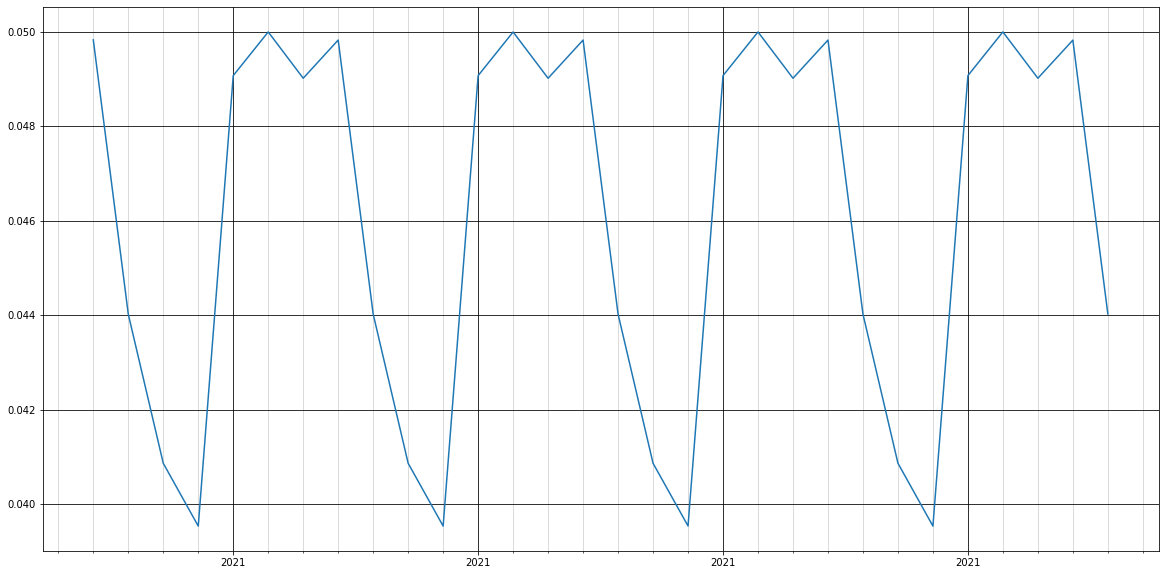

In [16]:

YOUR_GZ_FILE = './ensemble.csv.gz'

df1 = pd.read_csv(YOUR_GZ_FILE,compression='gzip',header=None,index_col=None)
mult = []
for i in range(7):
    mult.append(df1.values[:,i::7].mean()) 
mult = np.array(mult)
mult /= mult.max()
mult = np.array([mult[i%7] for i in range(30)])
print(mult)
display(df1)
for i in range(30):
    df1.iloc[:,i] = np.round((1/20.0)*df1.iloc[:,i].values*mult[i]/df1.iloc[:,i].values.mean(),4)
print(df1.values.min())
print(df1.values.max())

display(df1)

fig, ax = plt.subplots(figsize=(20,10))

ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.WeekdayLocator(0))
ax.grid(which='minor',c='lightgray')
ax.grid(which='major',c='black')
ax.plot(d0,np.mean(df1.values,axis=0))
df1.to_csv('./probe_equalize_weekdaymean.csv.gz',compression='gzip',header=None,index=None)


In [17]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('./probe_equalize_weekdaymean.csv.gz',compression='gzip',header=None,index_col=None)
df2 = pd.read_csv('./probe_19.csv.gz',compression='gzip',header=None,index_col=None)

v1 = np.array(df1.values)
v2 = np.array(df2.values)

v1 = v1/(np.sum(v1,axis=1).reshape(-1,1))
v2 = v2/(np.sum(v2,axis=1).reshape(-1,1))

v = np.round(0.5*(v1+v2),4)

for c in range(df1.shape[1]):
    df1.iloc[:,c] = v[:,c]

df1.to_csv('./probe_combined.csv.gz',compression='gzip',header=None,index=None)
